In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re


In [49]:
#importing datasets
d1 =pd.read_csv("./dataset1.csv")
d1
d2 = pd.read_csv("./dataset2.csv")
d2

#d1 is dataset1 and d2 is dataset2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0
...,...,...,...,...,...,...,...
2118,1/06/2018 3:41,6,8.0,20,1.000000,0.0,0
2119,1/06/2018 4:11,6,8.5,7,1.000000,0.0,0
2120,1/06/2018 4:41,6,9.0,6,1.000000,0.0,0
2121,1/06/2018 5:11,6,9.5,7,1.000000,0.0,0


In [50]:
#reading the dataset1, analyzing dtypes
print (d1.shape)
print (d1.head(5))
print (d1.tail())
print(d1.describe(include ="float64"))
print(d1.describe(include ="int64"))
print(d1.describe(include="object"))



(907, 12)
         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                         41     0       1      0   
3  30/12/2017 19:55                        111     1       0      0   
4  30/12/2017 19:55                        194     1       0      0   

        sunset_time  hours_after_sunset  season  
0  30/12/2017 16:45            1.870833       0  
1  30/12/2017 16:45            3.100833       0  
2  3

Investigation B 
Do the behaviours described above change following seasonal changes? 
It is known that in winter, alternative food sources are scarce and rat encounters are less frequent. In spring, food is more abundant and rat encounters are more common. To provide answers to both investigations, your team should decide the appropriate data science techniques to use for analysing the following datasets.

In [51]:
#We must see if bat–rat interactions or bat behaviours differ by season.
#Bat behaviour (risk, reward, vigilance time)
#Rat activity (rat arrivals, rat minutes)
#Food availability and see if these vary noticeably between winter and spring.

In [52]:
#counting values for season column in d1
d1['season'].value_counts()

season
1    756
0    151
Name: count, dtype: int64

In [53]:
#grouping for seasonal statistical summary
d1.groupby('season')[['bat_landing_to_food', 'risk', 'reward']].mean()

,bat_landing_to_food,risk,reward
season,,,
0,6.039623,0.562914,0.364238
1,12.846335,0.481481,0.567460


In [54]:
#data cleaning
#finding missing values
d1.isnull().sum()
#let's fill missing values instead of dropping
d1= d1.fillna({'habit':'NA'})
#rechecking the missing values
d1.isnull().sum()



start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
dtype: int64

In [55]:
#checking for duplicates:
dup1= print(d1.duplicated().sum())
dup2= print(d2.duplicated().sum())

1
0


In [56]:
# dropping the 1duplicate in dataset1
d1 = d1.drop_duplicates(keep='last')

#checking the update
dup1= print(d1.duplicated().sum())

0


In [57]:
#missing values of d2
d2.isnull().sum()

#output- 0 missing values


time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64

In [90]:
#importing cleaned/processed dataset from Assignment 2 
d1_clean =pd.read_csv("./d1_clean.csv")
d1
d2_clean = pd.read_csv("./d2_clean.csv")
d2


,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0
...,...,...,...,...,...,...,...
2118,1/06/2018 3:41,6,8.0,20,1.000000,0.0,0
2119,1/06/2018 4:11,6,8.5,7,1.000000,0.0,0
2120,1/06/2018 4:41,6,9.0,6,1.000000,0.0,0
2121,1/06/2018 5:11,6,9.5,7,1.000000,0.0,0


In [91]:
#inner merging
merged1 = pd.merge(d1, d2)

# Save the merged dataset to a new CSV file
merged1.to_csv('in_merged_dataset.csv', index=False)


In [92]:
#inner merge data analysis
print("Inner merge shape (number of rows, columns):", merged1.shape)
# Unique months in inner merge
print("Unique months in inner merge:", merged1['month'].unique())
print("Counts per month in inner merge:")
print(merged1['month'].value_counts())



Inner merge shape (number of rows, columns): (20, 17)
Unique months in inner merge: [4]
Counts per month in inner merge:
month
4    20
Name: count, dtype: int64


In [93]:
#data merging
merged2 = pd.merge(d1, d2, how='outer') # outer because tried using the defult inner which deleted everything except the 20 row that overlapped

# Save the merged dataset to a new CSV file
merged2.to_csv('out_merged_dataset.csv', index=False)

#check first few rows
print(merged2.head())

  start_time  bat_landing_to_food habit rat_period_start rat_period_end  \
0        NaN                  NaN   NaN              NaN            NaN   
1        NaN                  NaN   NaN              NaN            NaN   
2        NaN                  NaN   NaN              NaN            NaN   
3        NaN                  NaN   NaN              NaN            NaN   
4        NaN                  NaN   NaN              NaN            NaN   

   seconds_after_rat_arrival  risk  reward  month sunset_time  \
0                        NaN   NaN     NaN      0         NaN   
1                        NaN   NaN     NaN      0         NaN   
2                        NaN   NaN     NaN      0         NaN   
3                        NaN   NaN     NaN      0         NaN   
4                        NaN   NaN     NaN      0         NaN   

   hours_after_sunset  season              time  bat_landing_number  \
0                -2.0     NaN  29/12/2017 14:45                 7.0   
1               

In [101]:
# Check that all months are now present
print("Unique months:", merged2['month'].unique())
print("Shape of merged dataset:", merged2.shape)


Unique months: [0 1 2 3 4 5 6]
Shape of merged dataset: (3028, 17)


In [102]:
#cleaning the new(merged) dataset

merged2.isnull().sum()

#no null values

start_time                   2103
bat_landing_to_food          2103
habit                        2103
rat_period_start             2103
rat_period_end               2103
seconds_after_rat_arrival    2103
risk                         2103
reward                       2103
month                           0
sunset_time                  2103
hours_after_sunset              0
season                       2103
time                          905
bat_landing_number            905
food_availability             905
rat_minutes                   905
rat_arrival_number            905
dtype: int64

In [108]:
#EDA
#resuning cleaned Dataset from assignment 2 
# Statistical summary for key columns in d1_clean
print("Summary statistics for Dataset 1 (d1_clean):")
cols_d1_clean = ['risk', 'reward', 'season', 'month', 'bat_landing_to_food', 'seconds_after_rat_arrival']
print(d1_clean[cols_d1_clean].describe(include='all'))

# Statistical summary for key columns in d2
print("\nSummary statistics for Dataset 2 (d2_clean):")
cols_d2_clean = ['bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number', 'month', 'hours_after_sunset']
print(d2_clean[cols_d2_clean].describe(include='all'))




Summary statistics for Dataset 1 (d1_clean):
             risk      reward      season       month  bat_landing_to_food  \
count  760.000000  760.000000  760.000000  760.000000           760.000000   
mean     0.494737    0.577632    0.822368    3.742105             5.772235   
std      0.500302    0.494262    0.382454    1.214457             6.453563   
min      0.000000    0.000000    0.000000    0.000000             0.010238   
25%      0.000000    0.000000    1.000000    4.000000             1.000000   
50%      0.000000    1.000000    1.000000    4.000000             3.000000   
75%      1.000000    1.000000    1.000000    4.000000             8.000000   
max      1.000000    1.000000    1.000000    5.000000            27.000000   

       seconds_after_rat_arrival  
count                 760.000000  
mean                  276.131579  
std                   235.421593  
min                     0.000000  
25%                    87.000000  
50%                   202.500000  
75%    

In [128]:
#processing and preparing Habit Column
# Keep only string entries and remove 'NA'
# Keep only valid habit strings: letters + underscores, no digits or commas
d1_clean = d1_clean[d1_clean['habit'].apply(lambda x: isinstance(x, str) 
                          and x.upper() != 'NA' 
                          and bool(re.fullmatch(r'[A-Za-z_]+', x)))]


# Convert to categorical (optional, recommended)
d1_clean['habit'] = d1_clean['habit'].astype('category')

# Check the cleaned habit values
print(d1_clean['habit'].unique())
print(d1_clean['habit'].value_counts().head(30))



['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food', ..., 'rat_bat', 'pick_rat_and_bat', 'bat_fight_and_rat', 'not_sure_rat', 'rat_and_bat_and_pick']
Length: 50
Categories (50, object): ['attack_rat', 'bat', 'bat_and_pick', 'bat_and_pick_far', ..., 'rat_disappear', 'rat_pick', 'rat_pick_and_bat', 'rat_to_bat']
habit
fast                    245
rat                     205
pick                    127
bat                      26
bat_fight                22
bat_and_pick             17
bat_and_rat              14
rat_and_bat              12
rat_pick                  8
bats                      7
pick_and_others           6
pick_and_bat              6
other_bats                6
pick_bat                  5
others                    5
pick_and_rat              5
no_food                   4
pick_rat                  3
rat_and_pick              3
bat_pick                  2
fight                     2
pick_and_all              2
rat_and_bat_and_pick      1
rat_pick_and_bat          1
rat_dis

In [129]:

# Convert to category 
d1_clean['habit'] = d1_clean['habit'].astype('category')

# Create dummy variables
habit_dummies = pd.get_dummies(d1_clean['habit'], prefix='habit')
d1_clean = pd.concat([d1_clean, habit_dummies], axis=1)

# Check the cleaned dataset
print(d1_clean['habit'].unique())
print(d1_clean.head())

['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food', ..., 'rat_bat', 'pick_rat_and_bat', 'bat_fight_and_rat', 'not_sure_rat', 'rat_and_bat_and_pick']
Length: 50
Categories (50, object): ['attack_rat', 'bat', 'bat_and_pick', 'bat_and_pick_far', ..., 'rat_disappear', 'rat_pick', 'rat_pick_and_bat', 'rat_to_bat']
            start_time  bat_landing_to_food habit     rat_period_start  \
0  2017-12-30 18:37:00            16.000000   rat  2017-12-30 18:35:00   
1  2017-12-30 19:51:00             0.074016  fast  2017-12-30 19:50:00   
2  2017-12-30 19:51:00             4.000000  fast  2017-12-30 19:50:00   
3  2017-12-30 19:52:00            10.000000   rat  2017-12-30 19:50:00   
4  2017-12-30 19:54:00            15.000000   rat  2017-12-30 19:50:00   

        rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  2017-12-30 18:38:00                        108     1       0      0   
1  2017-12-30 19:55:00                         17     0       1      0   
2  2017-12-30 19:5

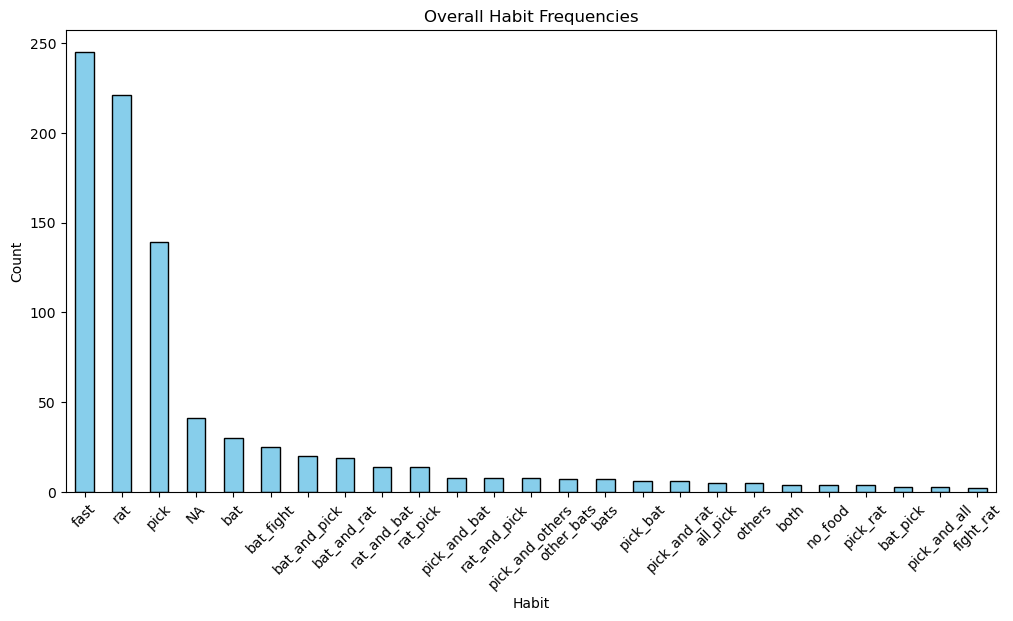

In [130]:
#plotting overall frequencies
# Sort by count for better visualization
habit_counts = d1['habit'].value_counts().sort_values(ascending=False).head(25)

habit_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(12,6))
plt.title('Overall Habit Frequencies')
plt.xlabel('Habit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [132]:
# List of specific habits to show on x-axis
# List of specific habits in the order you want them
selected_habits = [
    'fast', 'rat', 'pick', 'bat', 'bat_fight', 'bat_and_pick', 'bat_and_rat',
    'rat_and_bat', 'rat_pick', 'pick_and_bat', 'pick_and_others', 'rat_and_pick',
    'other_bats', 'bats', 'pick_and_rat', 'pick_bat', 'others', 'all_pick', 
    'no_food', 'pick_rat', 'both'
]

# Filter the dataframe
habit_season_counts_filtered = habit_season_counts[habit_season_counts['habit'].isin(selected_habits)]

# Ensure 'habit' column follows the specific order
habit_season_counts_filtered['habit'] = pd.Categorical(
    habit_season_counts_filtered['habit'],
    categories=selected_habits,
    ordered=True
)

# Plot grouped bar chart
plt.figure(figsize=(14,6))
sns.barplot(x='habit', y='count', hue='season_label', data=habit_season_counts_filtered)
plt.title('Selected Habit Frequencies by Season')
plt.xlabel('Habit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()



NameError: name 'habit_season_counts' is not defined

In [ ]:
#since season is in 0 & 1 categorizing 0 as winter and 1 as Spring
# Map numeric season to labels in the cleaned dataset
d1_clean['season_label'] = d1_clean['season'].map({0: 'Winter', 1: 'Spring'})

# Quick check
print(d1_clean[['season', 'season_label']].head())


   season season_label
0       0       Winter
1       0       Winter
2       0       Winter
3       0       Winter
4       0       Winter


[0 1]
season
1    671
0    147
Name: count, dtype: int64


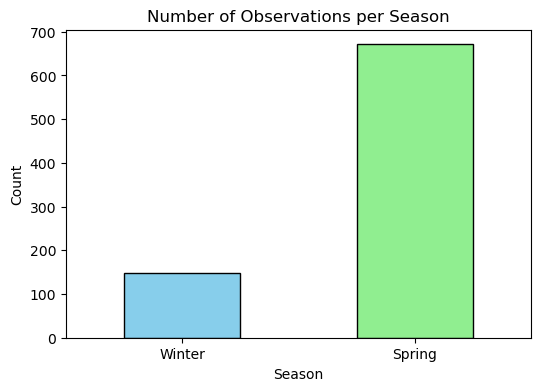

In [ ]:
# Unique values in the 'season' column
print(d1_clean['season'].unique())
print(d1_clean['season'].value_counts())

# Count rows per season
season_counts = d1_clean['season'].value_counts().sort_index()  # ensures 0,1 order

# Map numbers to labels for the x-axis
season_labels = {0: 'Winter', 1: 'Spring'}
season_counts.index = season_counts.index.map(season_labels)

# Plot bar chart
plt.figure(figsize=(6,4))
season_counts.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Number of Observations per Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#this is just showing observation during winter vs spring, no comparision with anything


In [134]:
#feature engineering, risk and reward to find boldness
# Map risk to behavior
d1_clean['behavior'] = d1_clean['risk'].map({0: 'Cautious', 1: 'Bold'})

print(d1_clean[['risk', 'behavior']].head())

def behavior_category(row):
    if row['risk'] == 1 and row['reward'] == 1:
        return 'Bold-HighReward'
    elif row['risk'] == 1 and row['reward'] == 0:
        return 'Bold-LowReward'
    elif row['risk'] == 0 and row['reward'] == 1:
        return 'Cautious-HighReward'
    else:
        return 'Cautious-LowReward'

# Apply to your cleaned dataset
d1_clean['behavior_category'] = d1_clean.apply(behavior_category, axis=1)

# Quick check
print(d1_clean[['risk','reward','behavior_category']].head())



   risk  behavior
0     1      Bold
1     0  Cautious
2     0  Cautious
3     1      Bold
4     1      Bold
   risk  reward    behavior_category
0     1       0       Bold-LowReward
1     0       1  Cautious-HighReward
2     0       1  Cautious-HighReward
3     1       0       Bold-LowReward
4     1       0       Bold-LowReward


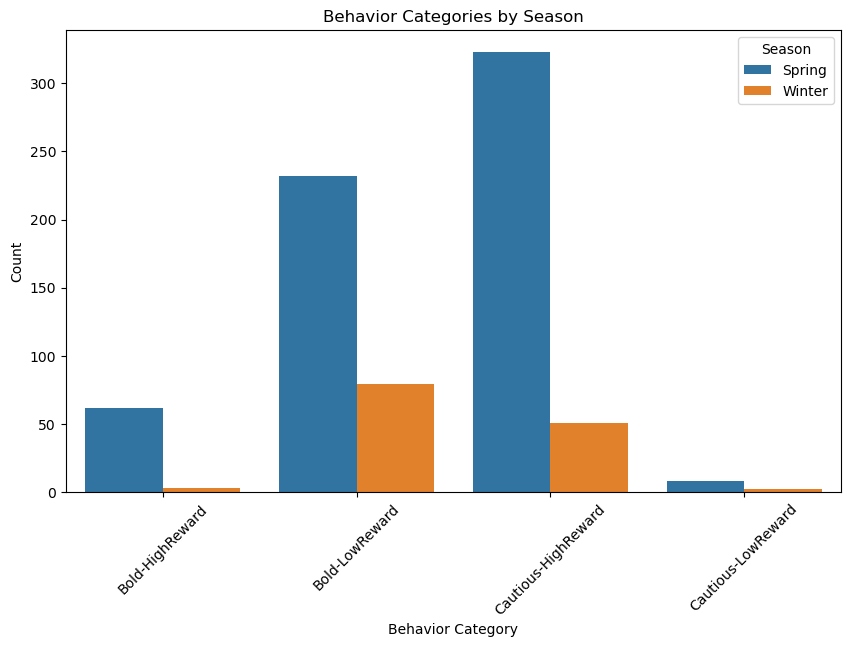

In [135]:
# Map season numbers to labels
season_map = {0: 'Winter', 1: 'Spring'}
d1_clean['season_label'] = d1_clean['season'].map(season_map)

# Count behaviors per season
behavior_counts = d1_clean.groupby(['season_label', 'behavior_category']).size().reset_index(name='count')

# Plot grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='behavior_category', y='count', hue='season_label', data=behavior_counts)
plt.title('Behavior Categories by Season')
plt.xlabel('Behavior Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()